## Assignment 2 [Part A] Cleaning and EDA

**_Bo Cao,  NUID:  001834167_**

### Dataset Description:

    The dataset I picked is a collection of the U.S airline delay information on Jan. 1st, 2015. Such 9 kinds of fields included in the raw datesets:

* **AIRLINE, FLIGHT_NUMBER**
* **ORIGIN_AIRPORT, DESTINATION_AIRPORT**
* **SCHEDULED_DEPARTURE, DEPARTURE_TIME, DEPARTURE_DELAY**
* **DISTANCE**
* **SCHEDULED_ARRIVAL, ARRIVAL_TIME, ARRIVAL_DELAY**
* DIVERTED
* CANCELLED (Flight Cancelled (1 = cancelled))
* CANCELLATION_REASON (Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security)
* **AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY**

31 columns of data included totally for above kinds of data

data tag in **bold** will be keep in the dataset, other columns of data will be discarded

In [31]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Make plots larger
plt.rcParams['figure.figsize'] = (16, 10)

In [32]:
#read flights.csv in flights
flights = pd.read_csv('flights.csv', sep=',')

## show the data samples of first 10 lines
flights.head(n=10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Discard Columns

* **YEAR, MONTH, DAY, DAY_OF_WEEK** are discarded because all the flights wecdoing research are in the Jan. 1st, 2015.
* **TAIL_NUMBER** has no meaning to this report.
* **TAXI_OUT, WHEELS_OFF, SCHEDULED_TIME, ELAPSED_TIME, AIR_TIME, WHEELS_ON, TAXI_IN** are discarded because the time are so concreate that we do not need that kind of data.

In [33]:
flights2 = flights.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','CANCELLATION_REASON'],axis=1)
flights2.head(3000)

,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,AS,98,ANC,SEA,5,2354.0,-11.0,1448,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,AA,2336,LAX,PBI,10,2.0,-8.0,2330,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,US,840,SFO,CLT,20,18.0,-2.0,2296,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,AA,258,LAX,MIA,20,15.0,-5.0,2342,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,AS,135,SEA,ANC,25,24.0,-1.0,1448,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN
5,DL,806,SFO,MSP,25,20.0,-5.0,1589,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
6,NK,612,LAS,MSP,25,19.0,-6.0,1299,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN
7,US,2013,LAX,CLT,30,44.0,14.0,2125,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN
8,AA,1112,SFO,DFW,30,19.0,-11.0,1464,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN
9,DL,1173,LAS,ATL,30,33.0,3.0,1747,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN


### Data cleaning 


* Are there missing values? 

** Answer: There are some missing cancel or delay values in the list because some flights are on time.**

In [34]:
flights2.isnull().sum()

AIRLINE                    0
FLIGHT_NUMBER              0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME           460
DEPARTURE_DELAY          460
DISTANCE                   0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME             470
ARRIVAL_DELAY            486
DIVERTED                   0
CANCELLED                  0
AIR_SYSTEM_DELAY       10963
SECURITY_DELAY         10963
AIRLINE_DELAY          10963
LATE_AIRCRAFT_DELAY    10963
WEATHER_DELAY          10963
dtype: int64

In [35]:
flights2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13950 entries, 0 to 13949
Data columns (total 18 columns):
AIRLINE                13950 non-null object
FLIGHT_NUMBER          13950 non-null int64
ORIGIN_AIRPORT         13950 non-null object
DESTINATION_AIRPORT    13950 non-null object
SCHEDULED_DEPARTURE    13950 non-null int64
DEPARTURE_TIME         13490 non-null float64
DEPARTURE_DELAY        13490 non-null float64
DISTANCE               13950 non-null int64
SCHEDULED_ARRIVAL      13950 non-null int64
ARRIVAL_TIME           13480 non-null float64
ARRIVAL_DELAY          13464 non-null float64
DIVERTED               13950 non-null int64
CANCELLED              13950 non-null int64
AIR_SYSTEM_DELAY       2987 non-null float64
SECURITY_DELAY         2987 non-null float64
AIRLINE_DELAY          2987 non-null float64
LATE_AIRCRAFT_DELAY    2987 non-null float64
WEATHER_DELAY          2987 non-null float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.9+ MB


* Are there inappropraite values? 
* Remove or impute any bad data. 



1. **DIVERTED**: If the filght is diverted, the result of it is not meaningful because it does not have any information about delay.
2. **CANCELLED**: If the flight is cancelled, the result of it is not meaningful because it does not have any information about delay.
3. **ARRIVAL_DELAY**: If flight delay time is more than 3 hours (180 min), it is not meaningful because it does not happen so frequently.

In [36]:
# Check how much lines of data with flight diverted

(flights2['DIVERTED']==1).sum()

## 20 lines will be discarded

20

In [37]:
# Check how much lines of data with flight cancelled

(flights2['CANCELLED']==1).sum()

## 466 lines will be discarded

466

In [61]:
# Show all the data whose flight is not diverted and not cancelled, then store them in flights_valid.
flights3 = flights2.loc[flights2['DIVERTED']==0]
flights_valid = flights3.loc[flights3['CANCELLED']==0]
flights_valid = flights_valid[flights_valid['ARRIVAL_DELAY'] <=180]
flights_valid

,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,AS,98,ANC,SEA,5,2354.0,-11.0,1448,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,AA,2336,LAX,PBI,10,2.0,-8.0,2330,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,US,840,SFO,CLT,20,18.0,-2.0,2296,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,AA,258,LAX,MIA,20,15.0,-5.0,2342,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,AS,135,SEA,ANC,25,24.0,-1.0,1448,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN
5,DL,806,SFO,MSP,25,20.0,-5.0,1589,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
6,NK,612,LAS,MSP,25,19.0,-6.0,1299,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN
7,US,2013,LAX,CLT,30,44.0,14.0,2125,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN
8,AA,1112,SFO,DFW,30,19.0,-11.0,1464,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN
9,DL,1173,LAS,ATL,30,33.0,3.0,1747,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN


In [62]:
# Show the mean of the flight ARRIVAL DELAY time (in Minutes)
flights_valid['ARRIVAL_DELAY'].mean()

4.071934930229087

    3. [SCHEDULED_DEPARTURE], [DEPARTURE_TIME], [SCHEDULED_ARRIVAL], [ARRIVAL_TIME] should lower than 2400 (24:00), which represent the time.
    
** The line of which columns has a value more than 2400 will be removed.**

In [63]:
(flights_valid['SCHEDULED_DEPARTURE']>2400).sum()

0

In [64]:
(flights_valid['DEPARTURE_TIME']>2400).sum()

0

In [65]:
(flights_valid['SCHEDULED_ARRIVAL']>2400).sum()

0

In [66]:
(flights_valid['ARRIVAL_TIME']>2400).sum()

0

### Answer the following questions for the data in each column:

* How is the data distributed?

1. Data of **['DEPARTURE_DELAY']** is **Normal Distribution**, because the both extreme advance departure time and extreme late departure time have the least possibility.
2. Data of **['ARRIVAL_DELAY']** is **Normal Distribution**, because the both extreme advance arrival time and extreme late arrival time have the least possibility.
3. Data of **['SCHEDULED_DEPARTURE'], ['DEPARTURE_TIME'], ['SCHEDULED_ARRIVAL'], ['ARRIVAL_TIME']** should be **Normal Distribution**, because the time value in the middle of the day has the greatset possibility, the time value on the earliest side and latest side has the least possibility.
4. Data from **['AIR_SYSTEM_DELAY'] → ['WEATHER_DELAY']** should be **Normal Distribution**, because the value in the middle has the greatest possibility, the value on the smallest side and largest side has the least possibility.


* What are the summary statistics?

    1. column **['DEPARTURE_DELAY']**
    2. column **['ARRIVAL_DELAY']**
    3. column **['SCHEDULED_DEPARTURE'], ['DEPARTURE_TIME'], ['SCHEDULED_ARRIVAL'], ['ARRIVAL_TIME']** have the summary statistics of familiar type.
    4. column **['AIR_SYSTEM_DELAY'] → ['WEATHER_DELAY']** have the summary statistics of familiar type.

In [67]:
flights_valid.head()

,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,AS,98,ANC,SEA,5,2354.0,-11.0,1448,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,AA,2336,LAX,PBI,10,2.0,-8.0,2330,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,US,840,SFO,CLT,20,18.0,-2.0,2296,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,AA,258,LAX,MIA,20,15.0,-5.0,2342,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,AS,135,SEA,ANC,25,24.0,-1.0,1448,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN


In [68]:
flights_valid.describe()

,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,13401.000000,13401.000000,13401.000000,13401.000000,13401.000000,13401.000000,13401.000000,13401.000000,13401.0,13401.0,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000
mean,2098.324006,1379.351242,1383.800761,8.308932,870.584882,1548.281397,1523.230132,4.071935,0.0,0.0,9.858755,0.095075,16.199384,16.204856,1.447332
std,1827.818566,456.629898,468.599095,24.322401,625.051712,483.518139,510.195660,27.409064,0.0,0.0,14.818513,2.312527,25.899558,26.159085,10.023525
min,1.000000,5.000000,1.000000,-27.000000,31.000000,2.000000,1.000000,-54.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,676.000000,1015.000000,1016.000000,-4.000000,404.000000,1212.000000,1159.000000,-12.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1499.000000,1400.000000,1404.000000,-1.000000,728.000000,1559.000000,1547.000000,-3.000000,0.0,0.0,3.000000,0.000000,7.000000,3.000000,0.000000
75%,3068.000000,1740.000000,1747.000000,11.000000,1111.000000,1930.000000,1928.000000,11.000000,0.0,0.0,17.000000,0.000000,21.000000,22.000000,0.000000
max,7438.000000,2359.000000,2359.000000,190.000000,4983.000000,2359.000000,2400.000000,179.000000,0.0,0.0,169.000000,107.000000,179.000000,174.000000,156.000000


In [69]:
flights_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13401 entries, 0 to 13948
Data columns (total 18 columns):
AIRLINE                13401 non-null object
FLIGHT_NUMBER          13401 non-null int64
ORIGIN_AIRPORT         13401 non-null object
DESTINATION_AIRPORT    13401 non-null object
SCHEDULED_DEPARTURE    13401 non-null int64
DEPARTURE_TIME         13401 non-null float64
DEPARTURE_DELAY        13401 non-null float64
DISTANCE               13401 non-null int64
SCHEDULED_ARRIVAL      13401 non-null int64
ARRIVAL_TIME           13401 non-null float64
ARRIVAL_DELAY          13401 non-null float64
DIVERTED               13401 non-null int64
CANCELLED              13401 non-null int64
AIR_SYSTEM_DELAY       2924 non-null float64
SECURITY_DELAY         2924 non-null float64
AIRLINE_DELAY          2924 non-null float64
LATE_AIRCRAFT_DELAY    2924 non-null float64
WEATHER_DELAY          2924 non-null float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.9+ MB


In [70]:
flights_valid.shape

(13401, 18)

In [71]:
# sample for the data column in Group 1

flights_valid.DEPARTURE_DELAY

0       -11.0
1        -8.0
2        -2.0
3        -5.0
4        -1.0
5        -5.0
6        -6.0
7        14.0
8       -11.0
9         3.0
10       -6.0
11       -8.0
12        0.0
13       -6.0
14       -1.0
15       -4.0
16      -14.0
17       -6.0
18       -4.0
19       -5.0
20       25.0
21       -8.0
22       -1.0
23       -2.0
24       -3.0
25       -3.0
26       -8.0
27       12.0
28      -10.0
29       21.0
         ... 
13918    -6.0
13919     0.0
13920    44.0
13921    25.0
13922    -3.0
13923    -5.0
13924    74.0
13926    28.0
13927    10.0
13928     6.0
13929    -3.0
13930    38.0
13931    -8.0
13932     3.0
13933    -2.0
13934    59.0
13935    33.0
13936    -2.0
13937     0.0
13938    39.0
13939    58.0
13940    -6.0
13941    46.0
13942    24.0
13943    68.0
13944    -8.0
13945    50.0
13946   -10.0
13947    47.0
13948    -9.0
Name: DEPARTURE_DELAY, Length: 13401, dtype: float64

In [72]:
# sample for the data column in Group 2

flights_valid.ARRIVAL_DELAY

0       -22.0
1        -9.0
2         5.0
3        -9.0
4       -21.0
5         8.0
6       -17.0
7       -10.0
8       -13.0
9       -15.0
10      -30.0
11      -10.0
12       -4.0
13      -22.0
14        8.0
15      -14.0
16      -24.0
17       -7.0
18      -18.0
19      -12.0
20        6.0
21        1.0
22       -1.0
23      -12.0
24      -23.0
25      -11.0
26       -3.0
27       25.0
28      -31.0
29        2.0
         ... 
13918     7.0
13919     3.0
13920    50.0
13921    36.0
13922    -4.0
13923    -7.0
13924    68.0
13926    47.0
13927   -13.0
13928     0.0
13929    -1.0
13930    18.0
13931   -13.0
13932    -6.0
13933    -9.0
13934    24.0
13935    15.0
13936    -5.0
13937    -1.0
13938    20.0
13939    47.0
13940   -32.0
13941    48.0
13942    -1.0
13943    46.0
13944   -29.0
13945    35.0
13946     3.0
13947    55.0
13948   -11.0
Name: ARRIVAL_DELAY, Length: 13401, dtype: float64

In [73]:
# head for several representative columns of data

flights_valid[['AIRLINE','FLIGHT_NUMBER','DEPARTURE_DELAY','ARRIVAL_DELAY','AIR_SYSTEM_DELAY']].head()

,AIRLINE,FLIGHT_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY
0,AS,98,-11.0,-22.0,NaN
1,AA,2336,-8.0,-9.0,NaN
2,US,840,-2.0,5.0,NaN
3,AA,258,-5.0,-9.0,NaN
4,AS,135,-1.0,-21.0,NaN


* Are there anomalies/outliers? 

Yes, there are.

## Plot each colmun as appropriate for the data type:

* Write a summary of what the plot tells you. 

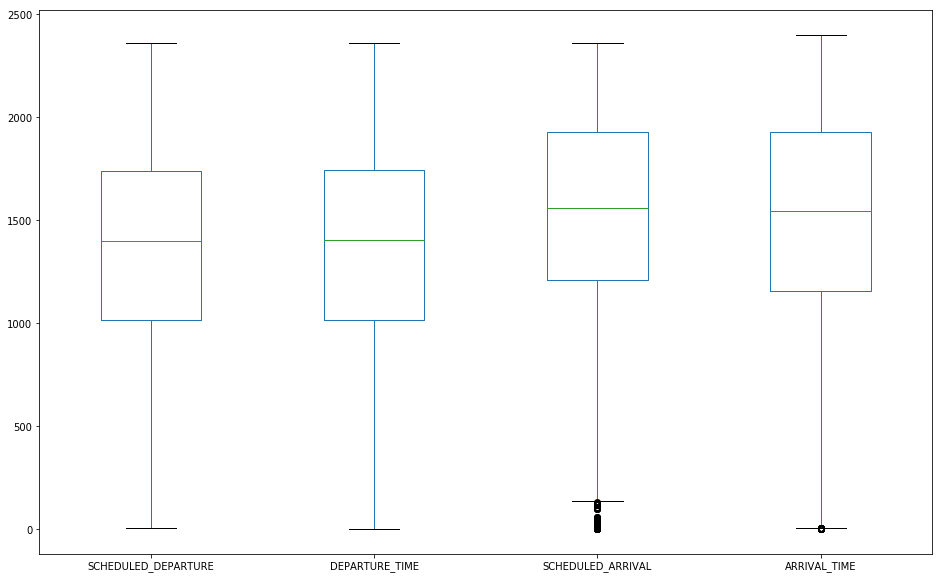

In [74]:
plt.show(flights_valid[['SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_ARRIVAL','ARRIVAL_TIME']].plot(kind='box'))

#### What could be read from the boxplot above?

The boxplot above for Departure and Arrival time could tell me the estimate value range, maximum value, 75th percentile, 50 percentile(mean), 25 percentile, minimum value. 
To the meaning of the time, 
* SCHEDULE_DEPARTURE and DEPARTURE_TIME could be match with the **Normal Distribution** model because the mean of the value range is in the middle.
* SCHEDULE_ARRIVAL and ARRIVAL_TIME are somewhat like SCHEDULE_DEPARTURE and DEPARTURE_TIME with a larger mean of the value because the flight time.

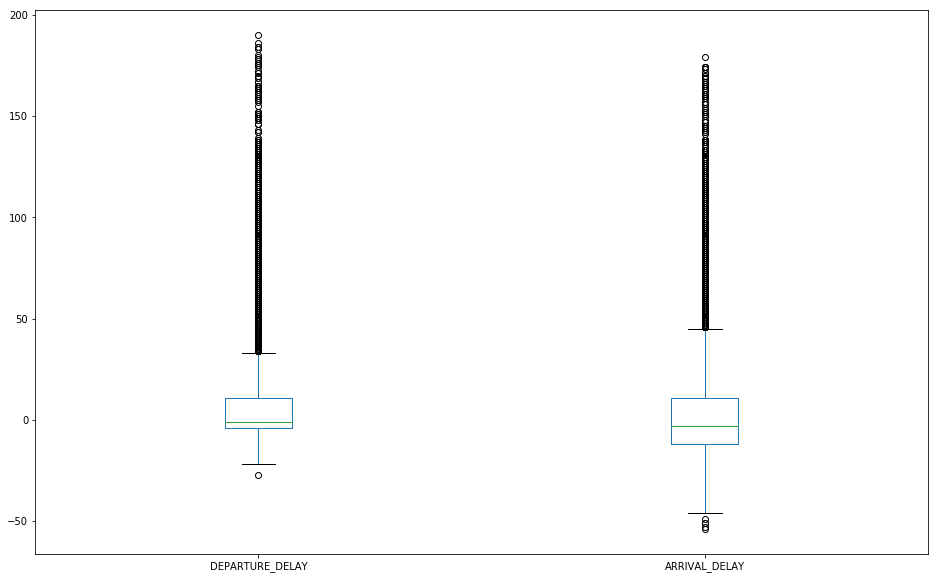

In [75]:
plt.show(flights_valid[['DEPARTURE_DELAY','ARRIVAL_DELAY']].plot(kind='box'))

#### What could be read from the boxplot above?

* More than 50 precent of the flights departure in delay, however less than 50 percent of the flights arrive in delay.
* Some flights data are so late that they are anomalies to the boxplot. 

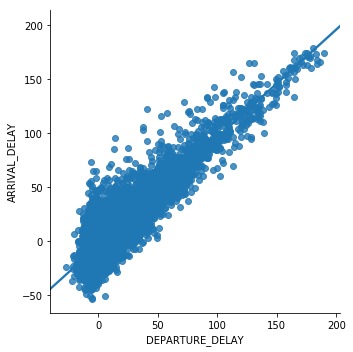

In [76]:
plt.show(sns.lmplot(x='DEPARTURE_DELAY',y='ARRIVAL_DELAY',data=flights_valid))

#### What could be read from the plot above?

* There are linear realtion between DEPARTURE_DELAY and ARRIVAL_DELAY

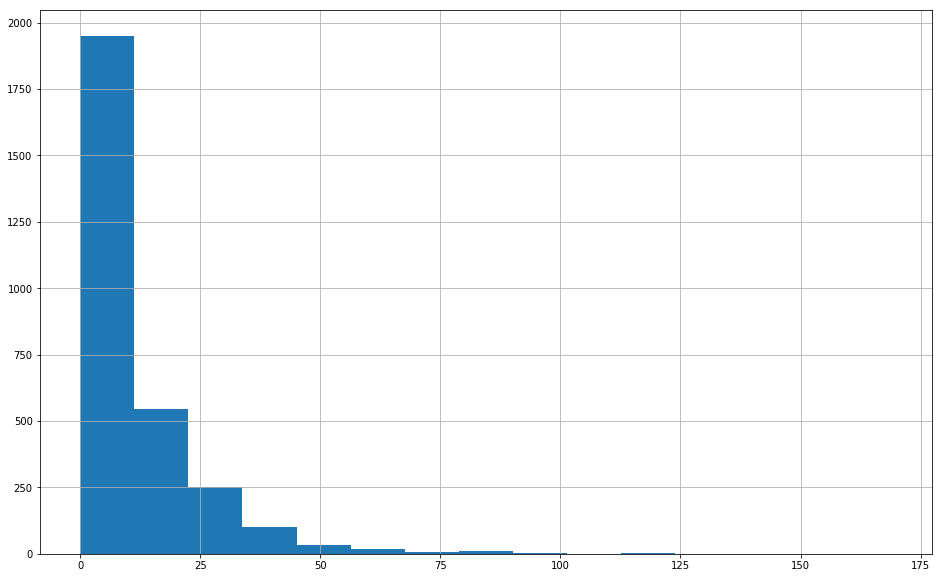

In [77]:
flights_valid['AIR_SYSTEM_DELAY'].hist(bins=15)

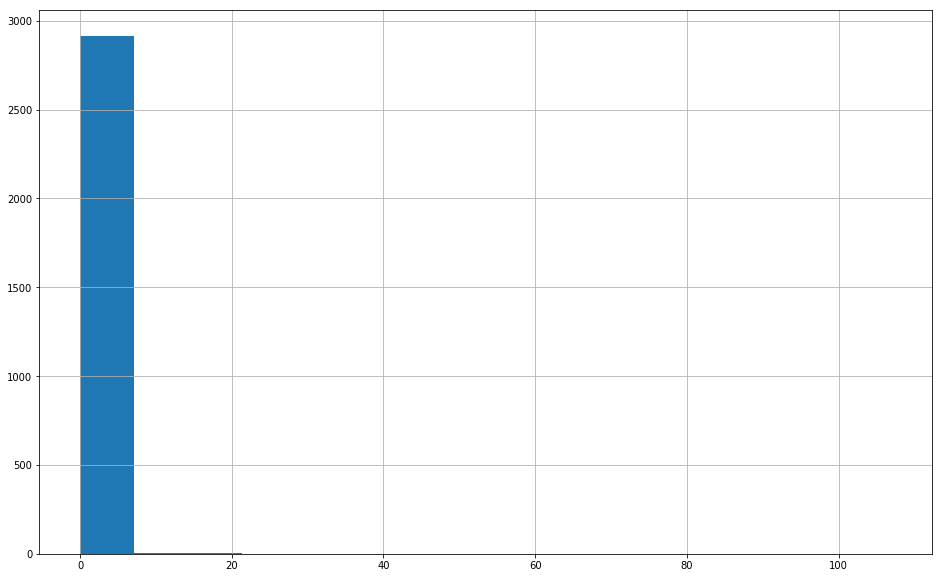

In [78]:
flights_valid['SECURITY_DELAY'].hist(bins=15)

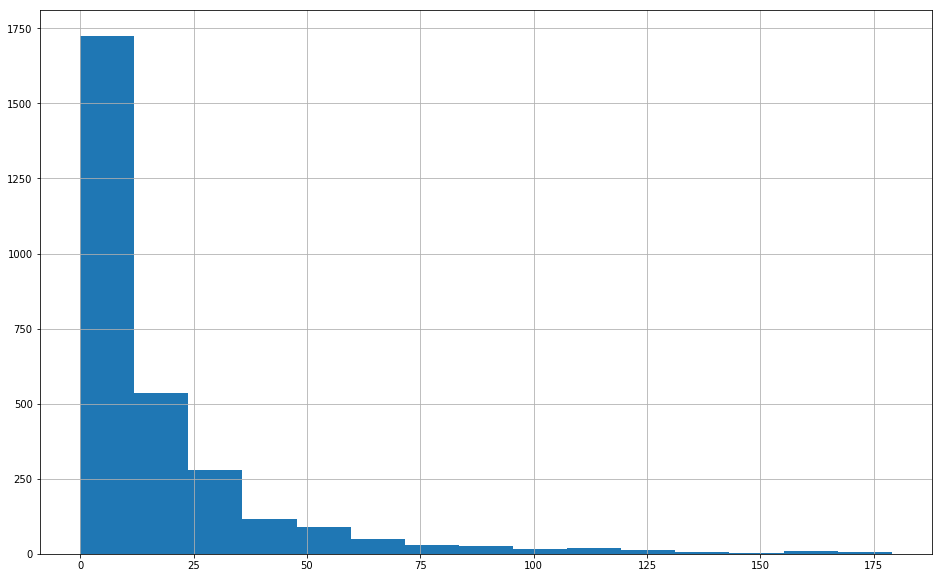

In [79]:
flights_valid['AIRLINE_DELAY'].hist(bins=15)

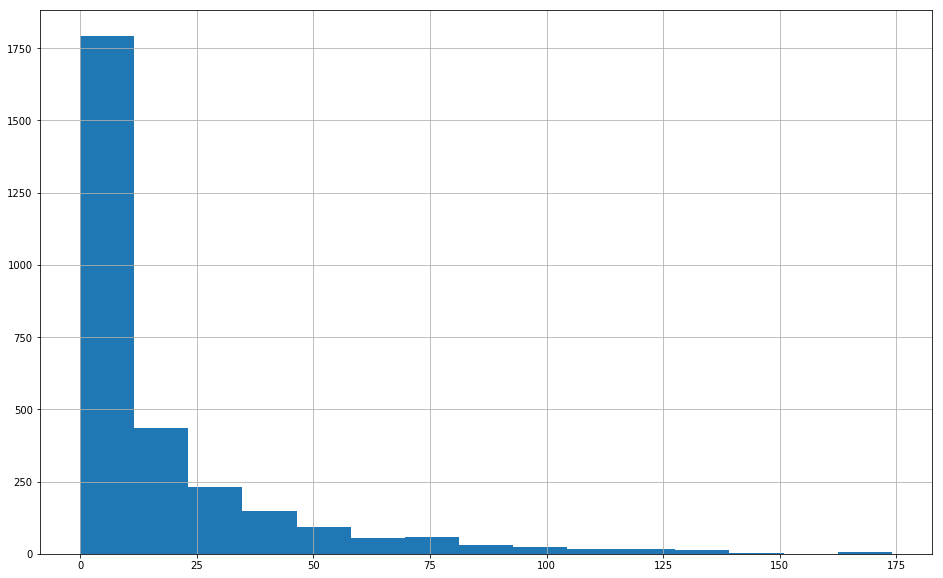

In [80]:
flights_valid['LATE_AIRCRAFT_DELAY'].hist(bins=15)

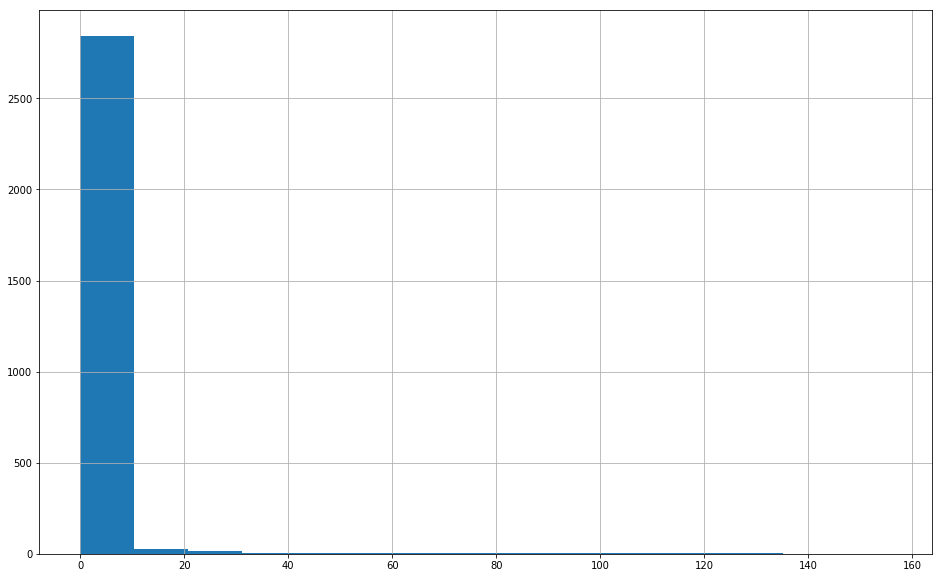

In [81]:
flights_valid['WEATHER_DELAY'].hist(bins=15)

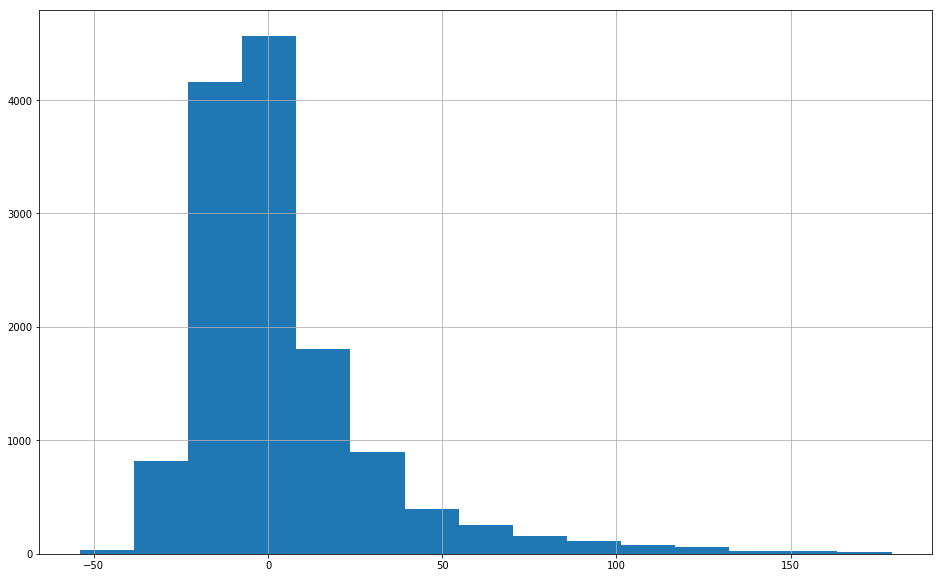

In [82]:
flights_valid['ARRIVAL_DELAY'].hist(bins=15)

#### What could be read from the histogram above?

* It is obivious that the ARRIVAL_DELAY follows the model of Normal distribution. With most of the data distribute in an fixed middle, which is estimately around zero point.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


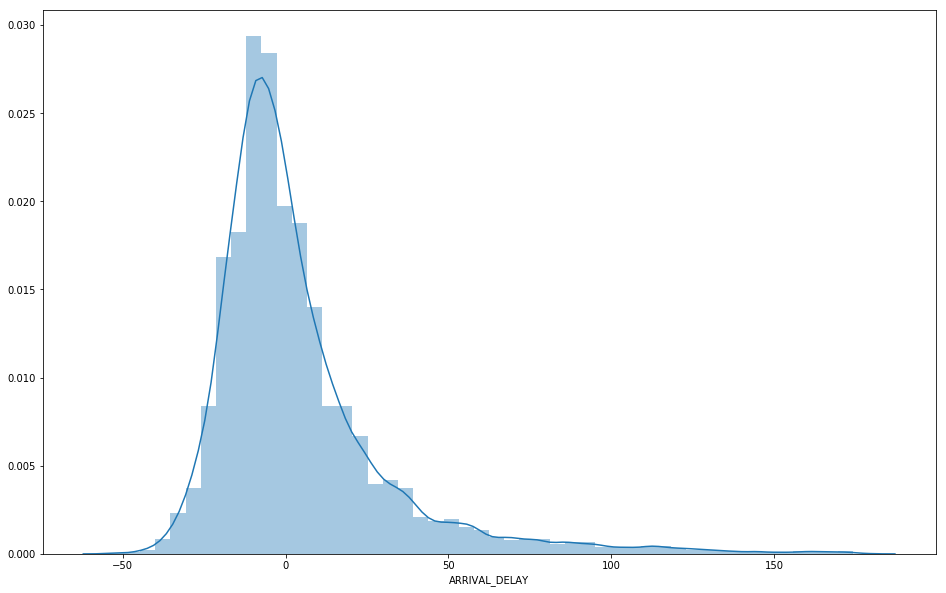

In [83]:
sns.distplot(flights_valid['ARRIVAL_DELAY'])

## Conclusion

From the diagram above, we can get some conclusion that most flight departure at about noon and most flight arrive at afternoon and the whole time schedule are normal distribution. Most flights can arrive at destination on time and the delay flights take only a small part of the whole flights data in the day of Jan 1, 2015.